In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import pandas as pd

file_path = '/content/drive/MyDrive/rtMatrix.txt' # Assuming the file is at the root of your Google Drive

matrix = np.loadtxt(file_path)

In [14]:
df = pd.DataFrame(matrix)

In [30]:
df10 = df.iloc[:, :10]

In [31]:
df10

,0,1,2,3,4,5,6,7,8,9
0,5.982,0.228,0.237,0.221,0.222,0.527,0.453,0.566,0.386,0.649
1,2.130,0.262,0.273,0.251,0.254,0.427,0.652,0.642,0.439,0.720
2,0.854,0.366,0.376,0.357,0.358,0.115,0.649,0.980,0.642,1.213
3,0.693,0.226,0.233,0.220,0.219,0.344,0.765,0.793,0.371,0.552
4,0.866,0.227,0.233,0.220,0.221,0.366,0.836,0.863,0.372,0.619
...,...,...,...,...,...,...,...,...,...,...
334,4.425,0.234,0.242,0.225,0.227,0.368,0.806,0.817,0.389,0.586
335,0.811,0.247,0.258,0.235,0.236,0.415,0.533,0.820,0.399,0.584
336,1.314,0.311,0.412,0.423,0.300,0.640,1.698,1.389,0.558,1.081
337,1.299,0.614,0.524,3.257,0.324,0.520,1.408,1.575,0.584,0.868


In [32]:
df10 = df10.replace(-1, np.nan)

In [33]:
print("Minimum values per column:")
print(df10.min())
print("Avg values per column:")
print(df10.sum())
print("\nMaximum values per column:")
print(df10.max())

Minimum values per column:
0    0.432
1    0.078
2    0.084
3    0.061
4    0.071
5    0.015
6    0.154
7    0.220
8    0.115
9    0.169
dtype: float64
Avg values per column:
0    711.859
1    110.656
2    123.355
3    108.892
4    105.988
5    307.222
6    412.306
7    349.244
8    182.380
9    436.792
dtype: float64

Maximum values per column:
0    16.523
1     4.290
2    13.835
3     3.317
4     3.103
5     6.582
6     9.626
7     9.552
8     3.726
9    13.237
dtype: float64


# Task
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Store df10 state before outlier removal for 'before' visualization
df10_before_outliers = df10.copy()

# Visualize Data Before Outlier Removal
print("Visualizing data before outlier removal:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df10_before_outliers.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df10_before_outliers[col])
    plt.title(f'Column {col} (Before)')
plt.tight_layout()
plt.show()

# Calculate IQR and Outlier Bounds and Remove Outliers
print("\nRemoving outliers using IQR method...")
for column in df10.columns:
    Q1 = df10[column].quantile(0.25)
    Q3 = df10[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df10[column] = np.where((df10[column] < lower_bound) | (df10[column] > upper_bound), np.nan, df10[column])
    print(f"Column {column}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}")

print("\nOutlier removal complete.")

# Visualize Data After Outlier Removal
print("\nVisualizing data after outlier removal:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df10.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df10[col])
    plt.title(f'Column {col} (After)')
plt.tight_layout()
plt.show()

# Summarize Results
print("\nSummary statistics after outlier removal:")
print(df10.describe())
```

## Prepare for Visualization

### Subtask:
Import necessary plotting libraries (matplotlib and seaborn) and store the current state of `df10` in a temporary DataFrame for 'before' visualization.


**Reasoning**:
Import the required plotting libraries and create a copy of the `df10` DataFrame for 'before' visualization as instructed.



In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

df10_before_outliers = df10.copy()
print("Imported matplotlib and seaborn, and created df10_before_outliers.")

Imported matplotlib and seaborn, and created df10_before_outliers.


## Visualize Data Before Outlier Removal

### Subtask:
Generate box plots or histograms for each of the 10 columns of the original `df10` to show their distributions before outlier removal.


**Reasoning**:
The subtask requires generating box plots for each column of the `df10_before_outliers` DataFrame. The instructions detail the steps, including printing a message, setting up the figure, iterating through columns, creating subplots, generating box plots, setting titles, adjusting layout, and displaying the plots.



Visualizing data before outlier removal:


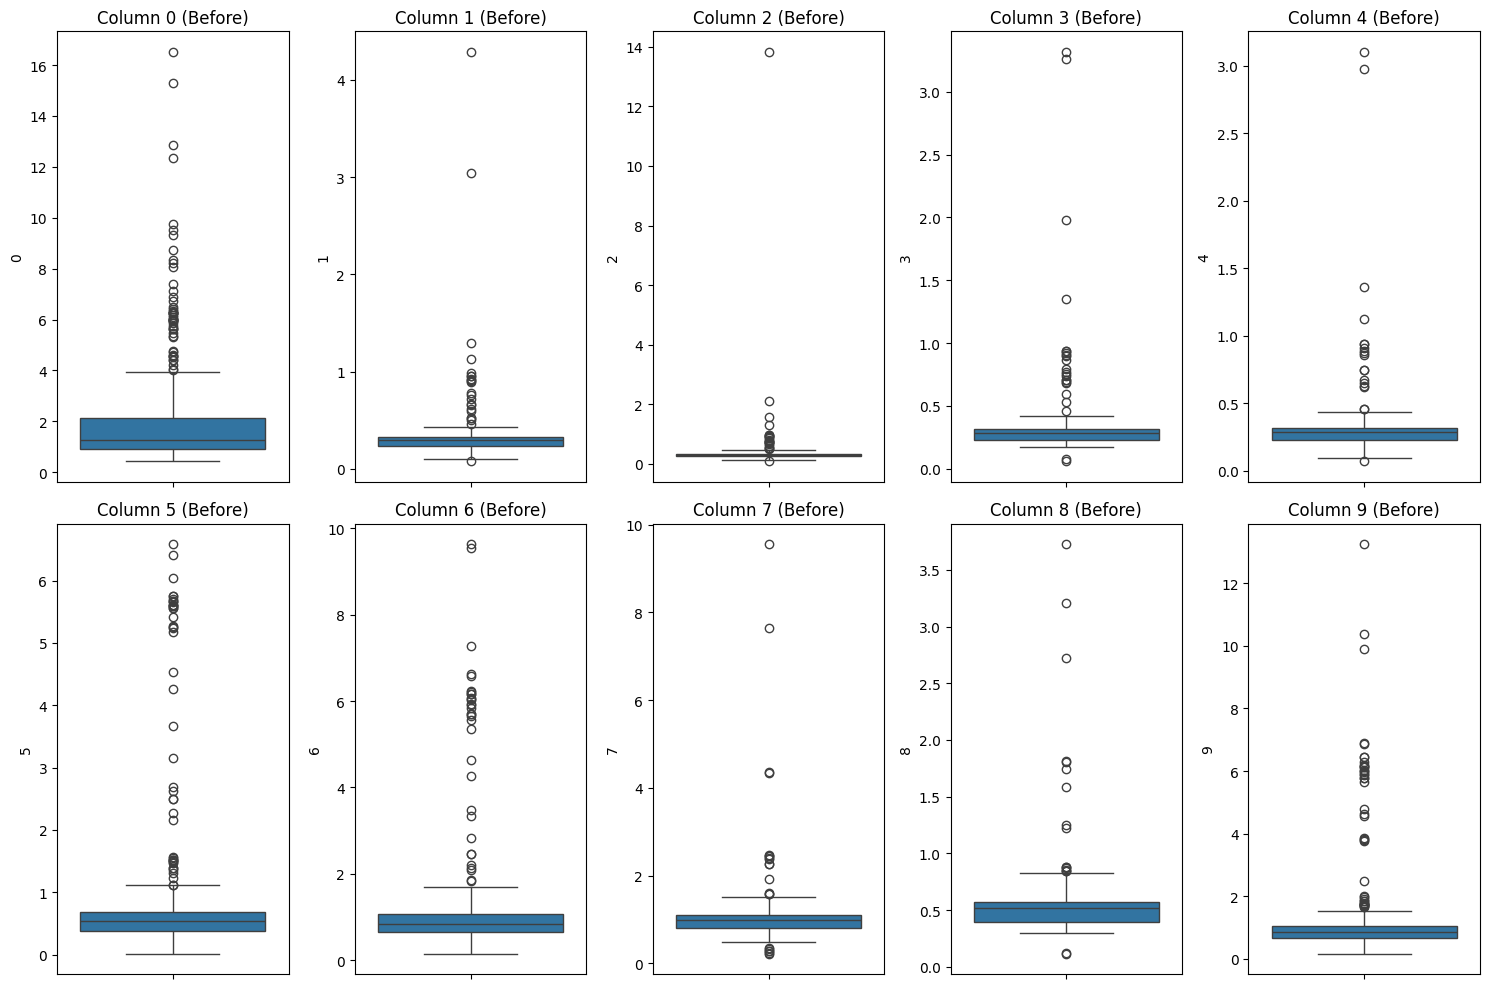

In [35]:
print("Visualizing data before outlier removal:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df10_before_outliers.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df10_before_outliers[col])
    plt.title(f'Column {col} (Before)')
plt.tight_layout()
plt.show()

## Calculate IQR and Remove Outliers

### Subtask:
Calculate the Interquartile Range (IQR) for each column of `df10`, determine the outlier bounds, and replace any values outside these bounds with `NaN`.

#### Instructions
1. Print a message indicating that outlier removal is starting.
2. Iterate through each column in the `df10` DataFrame.
3. For each column, calculate the first quartile (Q1) and the third quartile (Q3).
4. Compute the Interquartile Range (IQR) as the difference between Q3 and Q1.
5. Determine the lower bound for outliers as `Q1 - 1.5 * IQR`.
6. Determine the upper bound for outliers as `Q3 + 1.5 * IQR`.
7. Replace any values in the current column that are less than the lower bound or greater than the upper bound with `np.nan`.
8. Print the calculated Q1, Q3, IQR, lower bound, and upper bound for each column.
9. Print a message indicating that outlier removal is complete.

**Reasoning**:
The subtask requires calculating the IQR for each column, determining outlier bounds, and replacing outliers with NaN. This involves iterating through each column, computing Q1, Q3, IQR, and bounds, then applying the replacement logic, and finally printing the results and a completion message.



In [36]:
print("\nRemoving outliers using IQR method...")
for column in df10.columns:
    Q1 = df10[column].quantile(0.25)
    Q3 = df10[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df10[column] = np.where((df10[column] < lower_bound) | (df10[column] > upper_bound), np.nan, df10[column])
    print(f"Column {column}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}, Lower Bound={lower_bound:.2f}, Upper Bound={upper_bound:.2f}")

print("\nOutlier removal complete.")


Removing outliers using IQR method...
Column 0: Q1=0.91, Q3=2.13, IQR=1.22, Lower Bound=-0.91, Upper Bound=3.95
Column 1: Q1=0.23, Q3=0.32, IQR=0.09, Lower Bound=0.10, Upper Bound=0.46
Column 2: Q1=0.24, Q3=0.34, IQR=0.10, Lower Bound=0.10, Upper Bound=0.48
Column 3: Q1=0.23, Q3=0.32, IQR=0.09, Lower Bound=0.09, Upper Bound=0.45
Column 4: Q1=0.23, Q3=0.32, IQR=0.09, Lower Bound=0.09, Upper Bound=0.46
Column 5: Q1=0.38, Q3=0.68, IQR=0.29, Lower Bound=-0.05, Upper Bound=1.11
Column 6: Q1=0.65, Q3=1.07, IQR=0.42, Lower Bound=0.02, Upper Bound=1.70
Column 7: Q1=0.80, Q3=1.09, IQR=0.30, Lower Bound=0.36, Upper Bound=1.54
Column 8: Q1=0.40, Q3=0.57, IQR=0.17, Lower Bound=0.14, Upper Bound=0.83
Column 9: Q1=0.67, Q3=1.04, IQR=0.36, Lower Bound=0.13, Upper Bound=1.58

Outlier removal complete.


## Visualize Data After Outlier Removal

### Subtask:
Generate box plots or histograms for each of the 10 columns of the modified `df10` to show their distributions after outlier removal.

#### Instructions
1. Print a message indicating that data visualization after outlier removal is starting.
2. Create a figure with a specified size (e.g., 15x10 inches) to accommodate multiple plots.
3. Iterate through each of the 10 columns of the `df10` DataFrame.
4. For each column, create a subplot within the figure.
5. Generate a box plot for the current column using `seaborn.boxplot()`, setting the column data as the y-axis.
6. Set the title for each subplot to indicate the column number and that it represents data 'After' outlier removal.
7. Adjust the layout of the plots to prevent overlap using `plt.tight_layout()`.
8. Display the plots using `plt.show()`.

**Reasoning**:
Following the outlier removal, the next logical step is to visualize the data after the removal process. This involves generating box plots for each column of the modified `df10` DataFrame to show their distributions, similar to the 'before' visualization.




Visualizing data after outlier removal:


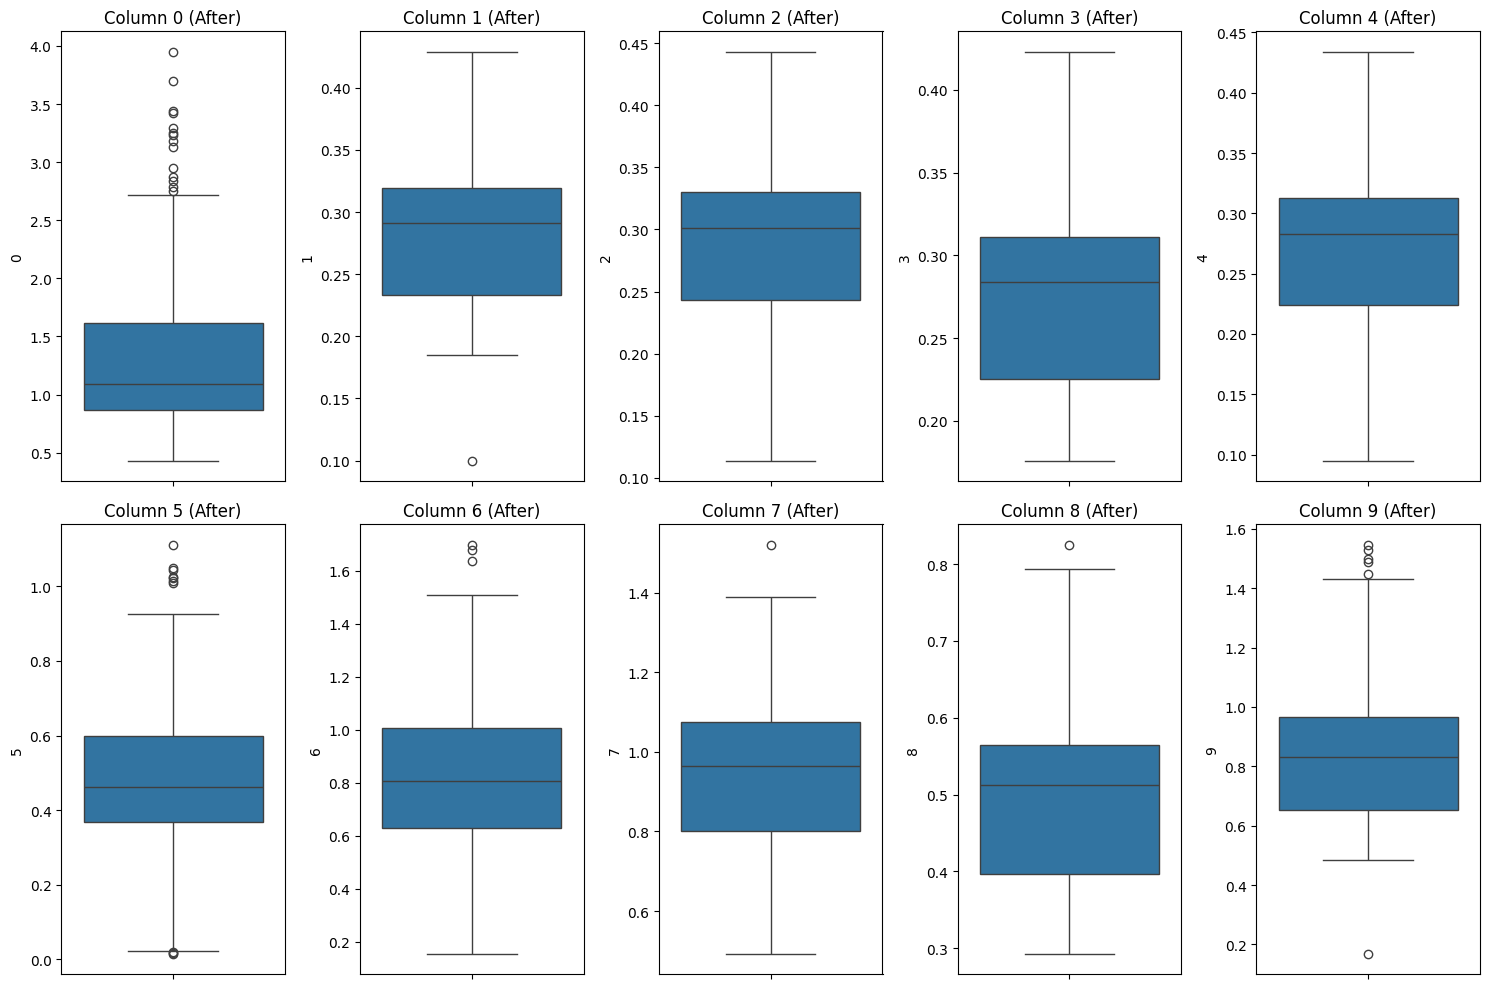

In [37]:
print("\nVisualizing data after outlier removal:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(df10.columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df10[col])
    plt.title(f'Column {col} (After)')
plt.tight_layout()
plt.show()

## Summarize Results After Outlier Removal

### Subtask:
Display summary statistics for the `df10` DataFrame after the outlier removal process.

#### Instructions
1. Print a message indicating that summary statistics after outlier removal are being displayed.
2. Use the `.describe()` method on the `df10` DataFrame to generate and print comprehensive summary statistics.

**Reasoning**:
After visualizing the data post-outlier removal, the final step is to display summary statistics for the modified `df10` DataFrame to understand the quantitative impact of the outlier removal process. This fulfills the last instruction of the overall task.



In [38]:
print("\nSummary statistics after outlier removal:")
print(df10.describe())


Summary statistics after outlier removal:
                0           1          2           3           4           5  \
count  278.000000  310.000000  312.00000  311.000000  315.000000  293.000000   
mean     1.318266    0.282194    0.29401    0.276328    0.276060    0.487092   
std      0.643537    0.054606    0.05672    0.055209    0.056756    0.191822   
min      0.432000    0.100000    0.11400    0.176000    0.095000    0.015000   
25%      0.866000    0.233000    0.24300    0.225000    0.224000    0.368000   
50%      1.087000    0.291000    0.30100    0.284000    0.283000    0.463000   
75%      1.616750    0.319000    0.33025    0.311000    0.313000    0.600000   
max      3.950000    0.429000    0.44300    0.423000    0.434000    1.111000   

                6           7           8           9  
count  306.000000  317.000000  317.000000  291.000000  
mean     0.818706    0.941025    0.498117    0.831567  
std      0.272130    0.204406    0.108105    0.223046  
min      0.1

In [39]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=(0, 5))

df10_scaled = pd.DataFrame(
    scaler.fit_transform(df10),
    columns=df10.columns,
    index=df10.index
)

In [43]:
print(df10_scaled.shape)
print(df10_scaled.describe())

(339, 10)
                0           1           2           3           4           5  \
count  278.000000  310.000000  312.000000  311.000000  315.000000  293.000000   
mean     1.259617    2.768899    2.735708    2.030931    2.670506    2.153705   
std      0.914635    0.829883    0.862012    1.117598    0.837116    0.875101   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.616828    2.021277    1.960486    0.991903    1.902655    1.610401   
50%      0.930927    2.902736    2.841945    2.186235    2.772861    2.043796   
75%      1.683840    3.328267    3.286474    2.732794    3.215339    2.668796   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

                6           7           8           9  
count  306.000000  317.000000  317.000000  291.000000  
mean     2.152545    2.181233    1.927789    2.405835  
std      0.881251    0.995161    1.016028    0.809897  
min      0.000000    0.000000    0.0